#Implementación CPM 

In [1]:
import pandas as pd

Elaborado por: Diana Decena, Alexander Kalen, Andrés Espinoza, Nicolás Silveira y Reynaldo Ramirez.

##1. Ensamblar tabla de actividades en forma de matriz (identificador, descripción, duración, requisito)

In [2]:
#Leer archivo
data_frame = pd.read_excel("tabla_activ.xlsx")

num_actividades = len(data_frame['Identificador'].tolist()) #Variable para conocer el número de actividades (# de filas de las matrices)

#Ensamblar la matriz usando el dataframe del archivo
tabla_actividades = []

tabla_actividades.append(data_frame['Identificador'].tolist())
tabla_actividades.append(data_frame['Descripción'].tolist())
tabla_actividades.append(data_frame['Duración'].tolist())
tabla_actividades.append(data_frame['Requisito'].tolist())
print(tabla_actividades)

[['A', 'B', 'C', 'D', 'E', 'F', 'G'], ['Quitar cerámicas', 'Instalar cableado', 'Instalar calentador', 'Instalar bomba', 'Instalar tuberías', 'Instalar jacuzzi', 'Pruebas y ajustes'], [2, 3, 1, 3, 2, 2, 2], ['none', 'A', 'B,E', 'E', 'A', 'C,D', 'F']]


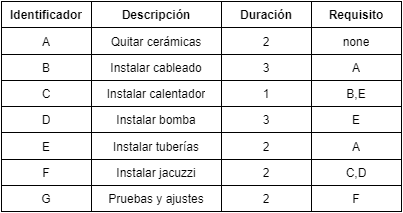

##2. Convertir en matriz de adyacencia para el forward 

In [3]:
#crear matriz de adyacencia a partir de los datos de entrada 
matriz_adyacencia_f = []
#inicializar matriz de adyacencia con ceros
for i in range(num_actividades):
		matriz_adyacencia_f.append([0]*num_actividades)

#se crea un diccionario para relacionar cada letras correspondiente a la actividad con un número 
dict_actividades = {}
cont = 0
for indentificador in tabla_actividades[0]:
  dict_actividades[indentificador] = cont
  cont += 1

#se crea la matriz de adyacencia 
for i in range(num_actividades):
  if tabla_actividades[3][i] != 'none':
    #verificar si es la actividad final 
    if i == num_actividades-1:
      matriz_adyacencia_f[i][i] = tabla_actividades[2][i]
    requisitos = tabla_actividades[3][i].split(",")
    #se guarda el valor correspondiente a la duración de la actividad 
    for j in requisitos:
      matriz_adyacencia_f[dict_actividades[j]][i] = tabla_actividades[2][dict_actividades[j]]

print(matriz_adyacencia_f)

[[0, 2, 0, 0, 2, 0, 0], [0, 0, 3, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 3, 0], [0, 0, 2, 2, 0, 0, 0], [0, 0, 0, 0, 0, 0, 2], [0, 0, 0, 0, 0, 0, 2]]


##3. Matriz de fechas (ES, EF, LS, LF)

In [4]:
#crea matriz de fechas que sea más general 
matriz_fechas = []
for i in range(num_actividades):
		matriz_fechas.append([0,0,999,999])

print(matriz_fechas)  

[[0, 0, 999, 999], [0, 0, 999, 999], [0, 0, 999, 999], [0, 0, 999, 999], [0, 0, 999, 999], [0, 0, 999, 999], [0, 0, 999, 999]]


##4. Forward-pass

In [5]:
#se aplica breadth first para recorrer el grafo

#se crea una cola para guardar los nodos 
cola = []
#array de visitados para saber cuales nodos se han visitado 
visitados = [False]*len(matriz_adyacencia_f)
seguir = True
#se inicia en el nodo 1
v = 1

while seguir:
  #si la cola tiene elementos se desencola 
  if cola:
    v = cola.pop(0)
  print('visito: '+str(v))

  tiempo_actual = 0

  #primero se recorre la fila en la matriz de la adyacencia del nodo actual 
  for h in range(len(matriz_adyacencia_f[v-1])):
    if matriz_adyacencia_f[v-1][h] != 0:
      #si el nodo es el primero la ES será igual a 0 y la EF igual a la duración de la actividad 
      if v == 1:
        matriz_fechas[v-1][0] = 0 
        matriz_fechas[v-1][1] = matriz_adyacencia_f[v-1][h]
      #para el resto de los nodos se guarda en la variable tiempo actual la duración de esa actividad 
      else:
        tiempo_actual = matriz_adyacencia_f[v-1][h]
      #se marca el nodo como visitado 
      visitados[v-1] = True
      #se agregan a la cola los hijos del nodo actual 
      if visitados[h] == False and h+1 not in cola:
        cola.append(h+1)
  #luego se vuelve a recorrer la fila en la matriz de adyacencia del nodo actual, pero esta vez para guardar los ES y EF de las otras actividades 
  for i in range(len(matriz_adyacencia_f[v-1])):
    #si el valor en la matriz de adyacencia en esa posición es distinto de cero (significa que la actividad es predecesora de la actual)
    if matriz_adyacencia_f[i][v-1] != 0 and i != v-1:
      #si el valor del nodo actual es distinto de 1
      if v!= 1:
        #si el valor EF en la matriz fechas de la posición actual es mayor al guardado del ES en la matriz fechas para el nodo actual 
        if matriz_fechas[i][1] > matriz_fechas[v-1][0]:
          #se guarda el valor como ES en la matriz fechas para el nodo actual 
          matriz_fechas[v-1][0] = matriz_fechas[i][1]
        #si el valor ES en la matriz fechas para la posicón actual + el tiempo actual guardado anteriormente es mayor al EF guardado del nodo actual   
        if matriz_fechas[i][1] + tiempo_actual > matriz_fechas[v-1][1]:
          #se guarda el valor como EF en la matriz fechas para el nodo actual 
          matriz_fechas[v-1][1] = matriz_fechas[i][1] + tiempo_actual
  print('cola: '+str(cola))
  #si todos los nodos han sido visitados se termina el ciclo 
  if False not in visitados:
    seguir = False

print(matriz_fechas)

visito: 1
cola: [2, 5]
visito: 2
cola: [5, 3]
visito: 5
cola: [3, 4]
visito: 3
cola: [4, 6]
visito: 4
cola: [6]
visito: 6
cola: [7]
visito: 7
cola: []
[[0, 2, 999, 999], [2, 5, 999, 999], [5, 6, 999, 999], [4, 7, 999, 999], [2, 4, 999, 999], [7, 9, 999, 999], [9, 11, 999, 999]]


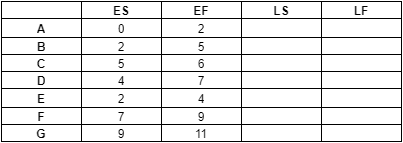

##5. Convertir en matriz de adyacencia para el backward

In [6]:
matriz_adyacencia_b = []
#inicializar matriz de adyacencia con ceros
for i in range(num_actividades):
		matriz_adyacencia_b.append([0]*num_actividades)

#se crea un diccionario para relacionar cada letras correspondiente a la actividad con un número 
dict_actividades = {}
cont = 0
for indentificador in tabla_actividades[0]:
  dict_actividades[indentificador] = cont
  cont += 1

#se crea la matriz de adyacencia 
for i in range(num_actividades):
  if i == 0:
    matriz_adyacencia_b[i][i] = tabla_actividades[2][i]
  if tabla_actividades[3][i] != 'none':
    #verificar si es la actividad final 
    if i == 0:
      matriz_adyacencia_b[i][i] = tabla_actividades[2][i]
    requisitos = tabla_actividades[3][i].split(",")
    #se guarda el valor correspondiente a la duración de la actividad 
    for j in requisitos:
      matriz_adyacencia_b[i][dict_actividades[j]] = tabla_actividades[2][dict_actividades[j]]

print(matriz_adyacencia_b)

[[2, 0, 0, 0, 0, 0, 0], [2, 0, 0, 0, 0, 0, 0], [0, 3, 0, 0, 2, 0, 0], [0, 0, 0, 0, 2, 0, 0], [2, 0, 0, 0, 0, 0, 0], [0, 0, 1, 3, 0, 0, 0], [0, 0, 0, 0, 0, 2, 0]]


##6. Backward-Pass

In [7]:
#se aplica breath first para recorrer el grafo

#se crea una cola para guardar los nodos 
cola = []
#array de visitados para saber cuales nodos se han visitado 
visitados = [False]*len(matriz_adyacencia_b)
seguir = True
#se inicia en el nodo 1
v = num_actividades
print(v)

while seguir:
  #si la cola tiene elementos s
  if cola:
    v = cola.pop(0)
  print('visito: '+str(v))
  #primero se recorre la fila en la matriz backwards adyacencia del nodo actual 
  for h in range(len(matriz_adyacencia_b[v-1])):
    if matriz_adyacencia_b[v-1][h] != 0:
      #si el nodo es el último la LS será igual a matriz_fechas[v-1][0] y la LF igual a matriz_fechas[v-1][1]
      if v == num_actividades:
        matriz_fechas[v-1][2] = matriz_fechas[v-1][0]
        matriz_fechas[v-1][3] = matriz_fechas[v-1][1]
      #se marca el nodo como visitado  
      visitados[v-1] = True
      #se agregan a la cola los hijos del nodo actual 
      if visitados[h] == False and h+1 not in cola:
        cola.append(h+1)
  #luego se vuelve a recorrer la fila en la matriz de adyacencia original del nodo actual, pero esta vez para guardar los ES y EF de las otras actividades 
  for i in range(len(matriz_adyacencia_f[v-1])):
    #si el valor en la matriz de adyacencia en esa posición es distinto de cero (significa que la actividad es predecesora de la actual)
    if matriz_adyacencia_f[v-1][i] !=0 and i != v-1:
      #si el nodo no es el último 
      if v!= num_actividades:
        #si el valor LS en la matriz fechas de la posición actual es menor al guardado del LF en la matriz fechas para el nodo actual o el valor LS en la posición actual es menor al LS del nodo actual
        if matriz_fechas[i][2] < matriz_fechas[v-1][3] or matriz_fechas[i][2] < matriz_fechas[v-1][2]:
          #se guarda el valor como LF en la matriz fechas para el nodo actual 
          matriz_fechas[v-1][3] = matriz_fechas[i][2]
        #si el valor LS en la matriz fechas para la posición actual - la duración de esa actividad es menor que el valor de LS del nodo actual  
        if matriz_fechas[i][2] - matriz_adyacencia_f[v-1][i] < matriz_fechas[v-1][2]:
          #se guarda el valor como LS en la matriz fechas para el nodo actual 
          matriz_fechas[v-1][2] = matriz_fechas[i][2] - matriz_adyacencia_f[v-1][i]
  print('cola: '+str(cola))
  #si todos los nodos han sido visitados se termina el ciclo 
  if False not in visitados:
    seguir = False

print(matriz_fechas)

7
visito: 7
cola: [6]
visito: 6
cola: [3, 4]
visito: 3
cola: [4, 2, 5]
visito: 4
cola: [2, 5]
visito: 2
cola: [5, 1]
visito: 5
cola: [1]
visito: 1
cola: []
[[0, 2, 0, 2], [2, 5, 3, 6], [5, 6, 6, 7], [4, 7, 4, 7], [2, 4, 2, 4], [7, 9, 7, 9], [9, 11, 9, 11]]


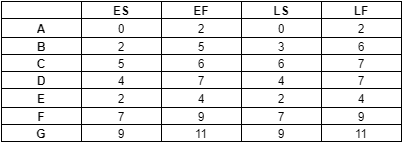

##7. Cálculo de holguras (S = LS - ES)

In [8]:
holguras = []

#Iterar n veces para las n holguras
for i in range(num_actividades):
  holgura = matriz_fechas[i][2] - matriz_fechas[i][0]
  holguras.append(holgura)

print(holguras)

[0, 1, 1, 0, 0, 0, 0]


##8. Imprimir reporte

In [9]:
print('##########################')
print('##### REPORTE DE CPM #####')
print('##########################\n\n')

#Imprimir las fechas ES, EF, LS y LF de cada actividad
print('*FECHAS DE LAS ACTIVIDADES:\n')

for i in range(num_actividades):
  print(tabla_actividades[0][i] + ' -'
        '\tES: ' + str(matriz_fechas[i][0]) +
        '\tEF:' + str(matriz_fechas[i][1]) +
        '\tLS:' + str(matriz_fechas[i][2]) +
        '\tLF:' + str(matriz_fechas[i][3]))
print('\n\n')

#Imprimir la ruta crítica
print('*ELEMENTOS DE RUTA CRÍTICA:\n')

for i in range(num_actividades):
  if (holguras[i] == 0):
    print(tabla_actividades[0][i] + ';', end=' ')
print('\n\n')

#Imprimir las holguras
print('*HOLGURAS:\n')

for i in range(num_actividades):
  if (holguras[i] != 0):
    print('La actividad '+ tabla_actividades[0][i] + ' tiene holgura de: '+ str(holguras[i]))

##########################
##### REPORTE DE CPM #####
##########################


*FECHAS DE LAS ACTIVIDADES:

A -	ES: 0	EF:2	LS:0	LF:2
B -	ES: 2	EF:5	LS:3	LF:6
C -	ES: 5	EF:6	LS:6	LF:7
D -	ES: 4	EF:7	LS:4	LF:7
E -	ES: 2	EF:4	LS:2	LF:4
F -	ES: 7	EF:9	LS:7	LF:9
G -	ES: 9	EF:11	LS:9	LF:11



*ELEMENTOS DE RUTA CRÍTICA:

A; D; E; F; G; 


*HOLGURAS:

La actividad B tiene holgura de: 1
La actividad C tiene holgura de: 1
